In [10]:
import os
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib as mpl
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.font_manager as font_manager
from matplotlib.ticker import MultipleLocator, FormatStrFormatter


In [2]:
## Plot dla structures


fontlabel = {'family': 'monospace',
        'size': 22,
        }
N = 10001

file = 'dla_13'
x = np.zeros(10001)
z = np.zeros(10001)
z_height = 1
i = 0
cont = 0
a = []
with open('./files/dla/%s' %file) as fid:
    for row in fid:
        row = row.split()
        x = int(row[2])
        z = int(row[4])
        a.append([x,z])
        #print(row)
        cont+=1
a = np.array(a).T

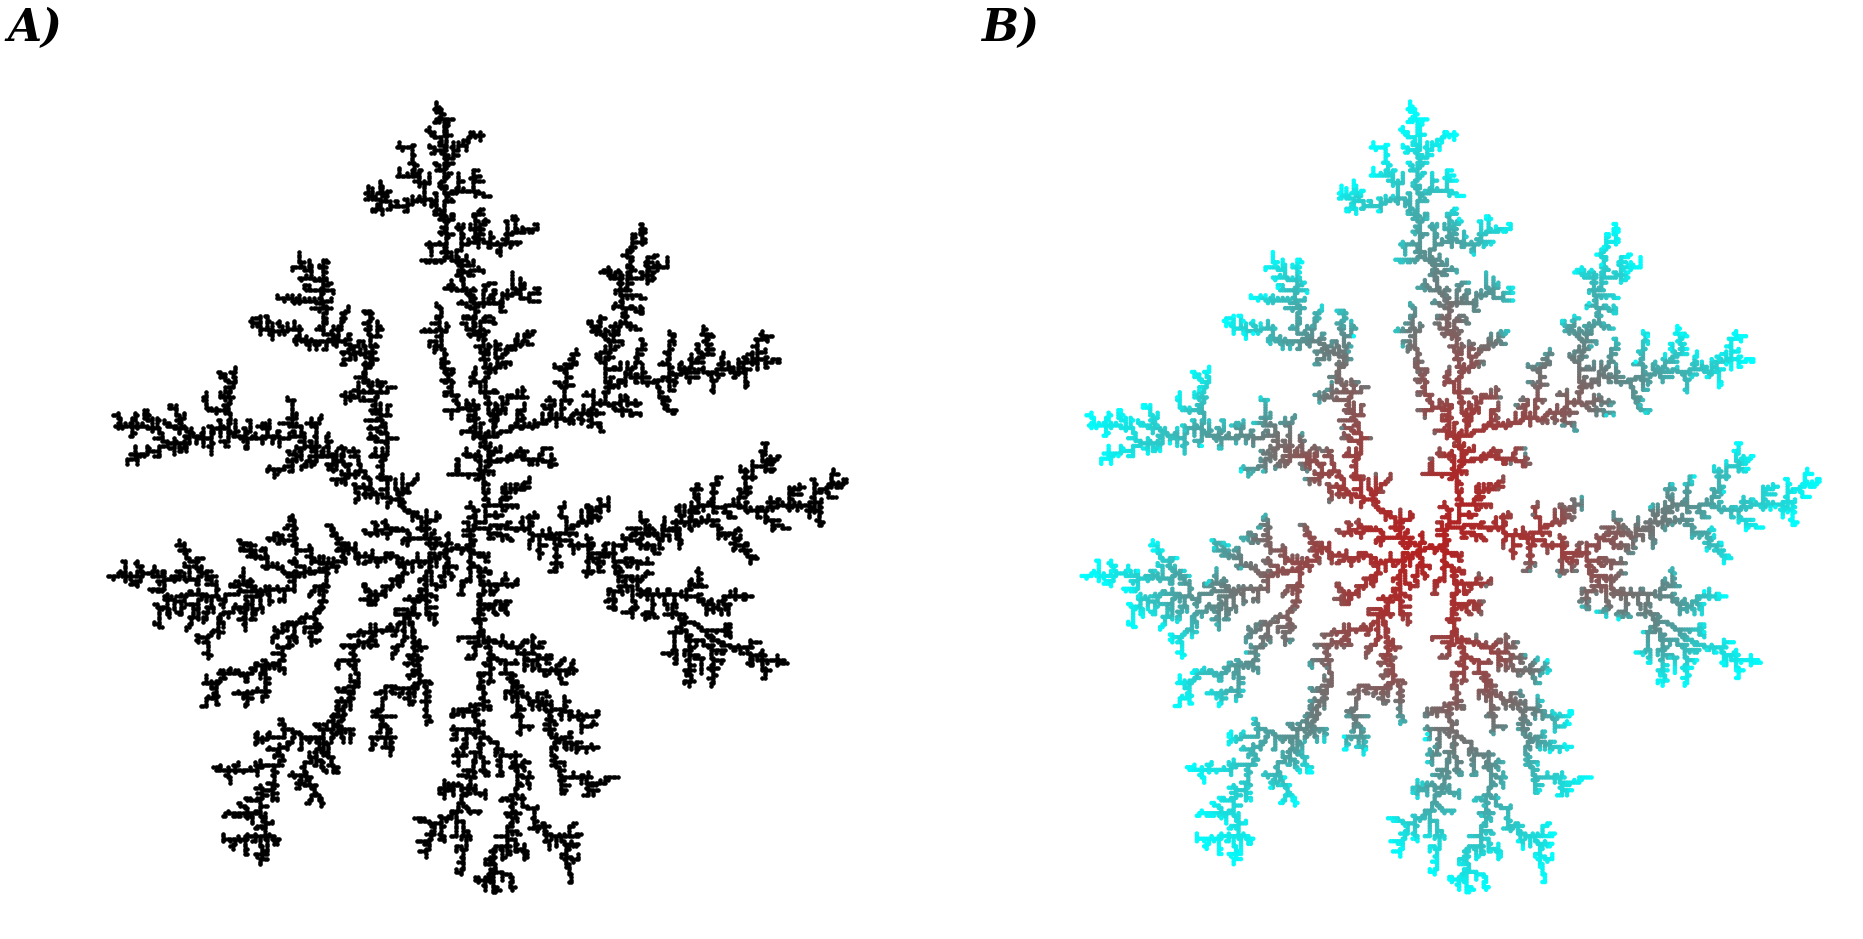

In [57]:
colors = ['firebrick', 'cyan'] # first color is black, last is red
cm = LinearSegmentedColormap.from_list(
        "Custom", colors, N=N)

fontlabel = {'family': 'serif',
        'color':  'black',
        'weight': 'heavy',
        'style': 'italic',
        'size': 44,
        }
fig,axs = plt.subplots(1,2,figsize = (32,16))
axs[0].scatter(a[0],a[1], color = 'black',s=12, marker = 'o')
axs[0].text(-180,200,'A)',fontdict=fontlabel)


axs[1].scatter(a[0],a[1],c = np.arange(N), cmap = cm,s=12, marker = 'o')
axs[1].text(-180,200,'B)',fontdict=fontlabel)

#plt.plot(x,z,'ks')
#plt.plot(0,0,'rs')
axs[0].axis('off')
axs[1].axis('off')
fig.savefig("dla_structure.png", dpi=400)
plt.show()

In [34]:
#Frac Dimension



def fractal(Radius,x,z,xcent,zcent,contador):
    ## frac dimension 
    n = 100
    radius = np.linspace(5,Radius,n)
    cont = np.zeros(n)
    for j in range(0,len(radius)):
        c = 0
        for i in range(0,len(x)):
            ri = np.sqrt(((x[i]-xcent) **2) + ((z[i]-zcent)**2))
            if ri <= radius[j]:
                c += 1
                cont[j] = c
    #radius = 0
    #occup = float(len(x))
    #A = float(np.pi*(Radius**2))
    #densitty = float(occup/A * 100)
    #print("massa: %f" % occup)
    #print("Area: %f" %A)
    #print("Densidade %.2f" % densitty)
    #print(radius)
    vmin = np.log(radius[0])
    vmax = np.log(radius[-1])
    radius = np.log(radius).reshape(-1,1)
    cont = np.log(cont/(contador + 1)).reshape(-1,1)
    j, R = 0, 0
    #print(radius)
    #print(cont)
    for i in range(10,len(radius)):
        reg = LinearRegression().fit(radius[:i], cont[:i])
        r2 = reg.score(radius[:i], cont[:i])
        if(r2 > R):     
            R = r2
            j = i
        #Y = reg.coef_*v[:i] + reg.intercept_
    reg = LinearRegression().fit(radius[:j], cont[:j])
    #print(reg.coef_,reg.intercept_)
    #print(v[-1][0])
    Y = reg.coef_*np.array([vmin,vmax]) + reg.intercept_
    plt.figure(figsize=(10,10))


    fontlabel = {'family': 'serif',
            'color':  'black',
            'weight': 'heavy',
            'style': 'italic',
            'size': 22,
            }

    fontlegend = font_manager.FontProperties(family='serif',
                                    weight='heavy',
                                    style = 'italic', 
                                    size = 16)
    plt.plot(radius, cont,color = 'darkslategray', linewidth = 4,linestyle='',markersize=12, marker = 'd')
    plt.xlabel('log R (lattices units)')
    plt.ylabel('log m (ocuppied lattices units)')
    plt.plot(np.array([vmin,vmax]), Y[0],color = 'firebrick', linewidth = 4,linestyle='solid',markersize=12, marker = '',label = "df = {:.2f}".format(reg.coef_[0][0]))
    plt.legend( loc = 'best',prop=fontlegend)
    plt.xlabel('log R (Unidades de rede)',fontdict=fontlabel)
    plt.ylabel("log m (Unidades de rede ocupada)",fontdict=fontlabel)
    plt.xticks(size = 20, family = 'serif', weight = 'normal')
    plt.yticks(size = 20, family = 'serif', weight = 'normal')
    plt.tick_params(direction = 'in',bottom = True, top= True, left= True, right= True )
    plt.savefig("frac_dimension.jpg", dpi=400)
    #plt.show()


    return reg.coef_[0][0]

dla_12
dla_27
dla_13
dla_31
dla_10
dla_29
dla_11
dla_20
dla_28
dla_21
dla_32
dla_22
dla_24
dla_16
dla_26
dla_14
dla_33
dla_18
dla_34
dla_19
dla_23
dla_15
dla_25
dla_30
dla_17
250025
218.0022935659164


1.664185767221428

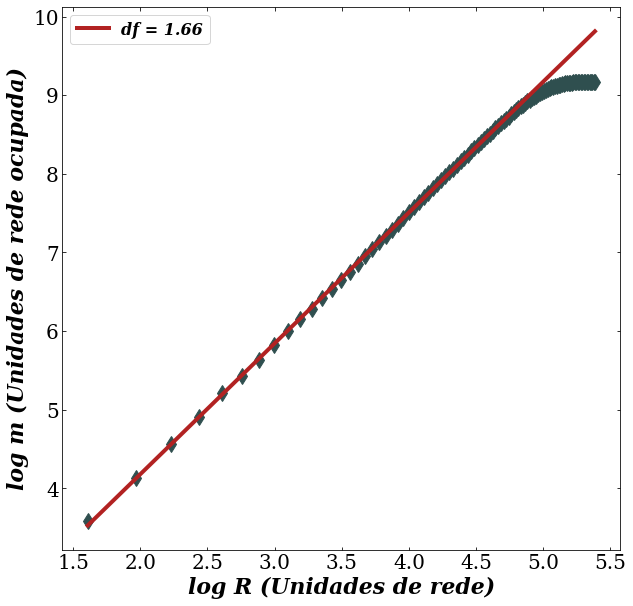

In [35]:
xs, zs, = [], []
for file in os.listdir('./files/dla/'):
    print(file)
    with open('./files/dla/%s' %file, 'r') as fid:
        for row in fid:
            row = row.split()
            xs.append(int(row[2]))
            zs.append(int(row[4]))

print(len(zs))

R = 0
for i in range(len(xs)):
    r = np.sqrt(xs[i]**2 + zs[i]**2)
    if r > R:
        R = r

print(R)

fractal(R,xs,zs,0,0,25)


linha 0
linha 1
linha 2
linha 3
linha 4
linha 5
linha 6
linha 7
linha 8
linha 9
linha 10
linha 11
linha 12
linha 13
linha 14
linha 15
linha 16
linha 17
linha 18
linha 19
linha 20
linha 21
linha 22
linha 23
linha 24
linha 25
linha 26
linha 27
linha 28
linha 29
linha 30
linha 31
linha 32
linha 33
linha 34
linha 35
linha 36
linha 37
linha 38
linha 39
linha 40
linha 41
linha 42
linha 43
linha 44
linha 45
linha 46
linha 47
linha 48
linha 49
linha 50
linha 51
linha 52
linha 53
linha 54
linha 55
linha 56
linha 57
linha 58
linha 59
linha 60
linha 61
linha 62
linha 63
linha 64
linha 65
linha 66
linha 67
linha 68
linha 69
linha 70
linha 71
linha 72
linha 73
linha 74
linha 75
linha 76
linha 77
linha 78
linha 79
linha 80
linha 81
linha 82
linha 83
linha 84
linha 85
linha 86
linha 87
linha 88
linha 89
linha 90
linha 91
linha 92
linha 93
linha 94
linha 95
linha 96
linha 97
linha 98
linha 99
linha 100
linha 101
linha 102
linha 103
linha 104
linha 105
linha 106
linha 107
linha 108
linha 109
linha 110


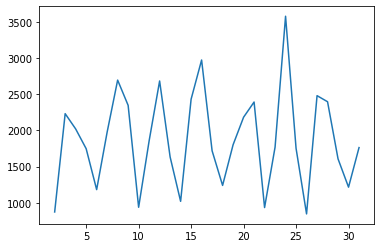

In [8]:
corre , R= [], []
N = 10001
r = 1
l = 0
for i in range(0,30):
    r = r +1
    c = 0
    with open('./files/teste2d_2.txt') as fid:
        for row in fid:
            row = row.split()
            x = int(row[2])
            z = int(row[4])
            ri = x**2 + z**2
            rn = ri +r
            print('linha %d' %l)
            l += 1
            with open('./files/teste2d_2.txt') as fid2:
                for row in fid2:
                    row = row.split()
                    x2 = int(row[2])
                    z2 = int(row[4])

                    rt = (x2 - x)**2 + (z2 - z)**2
                    if rt == rn:
                        c += 1
                        break

        corre.append(c)
        R.append(r)

print(corre)
plt.plot(R,corre)

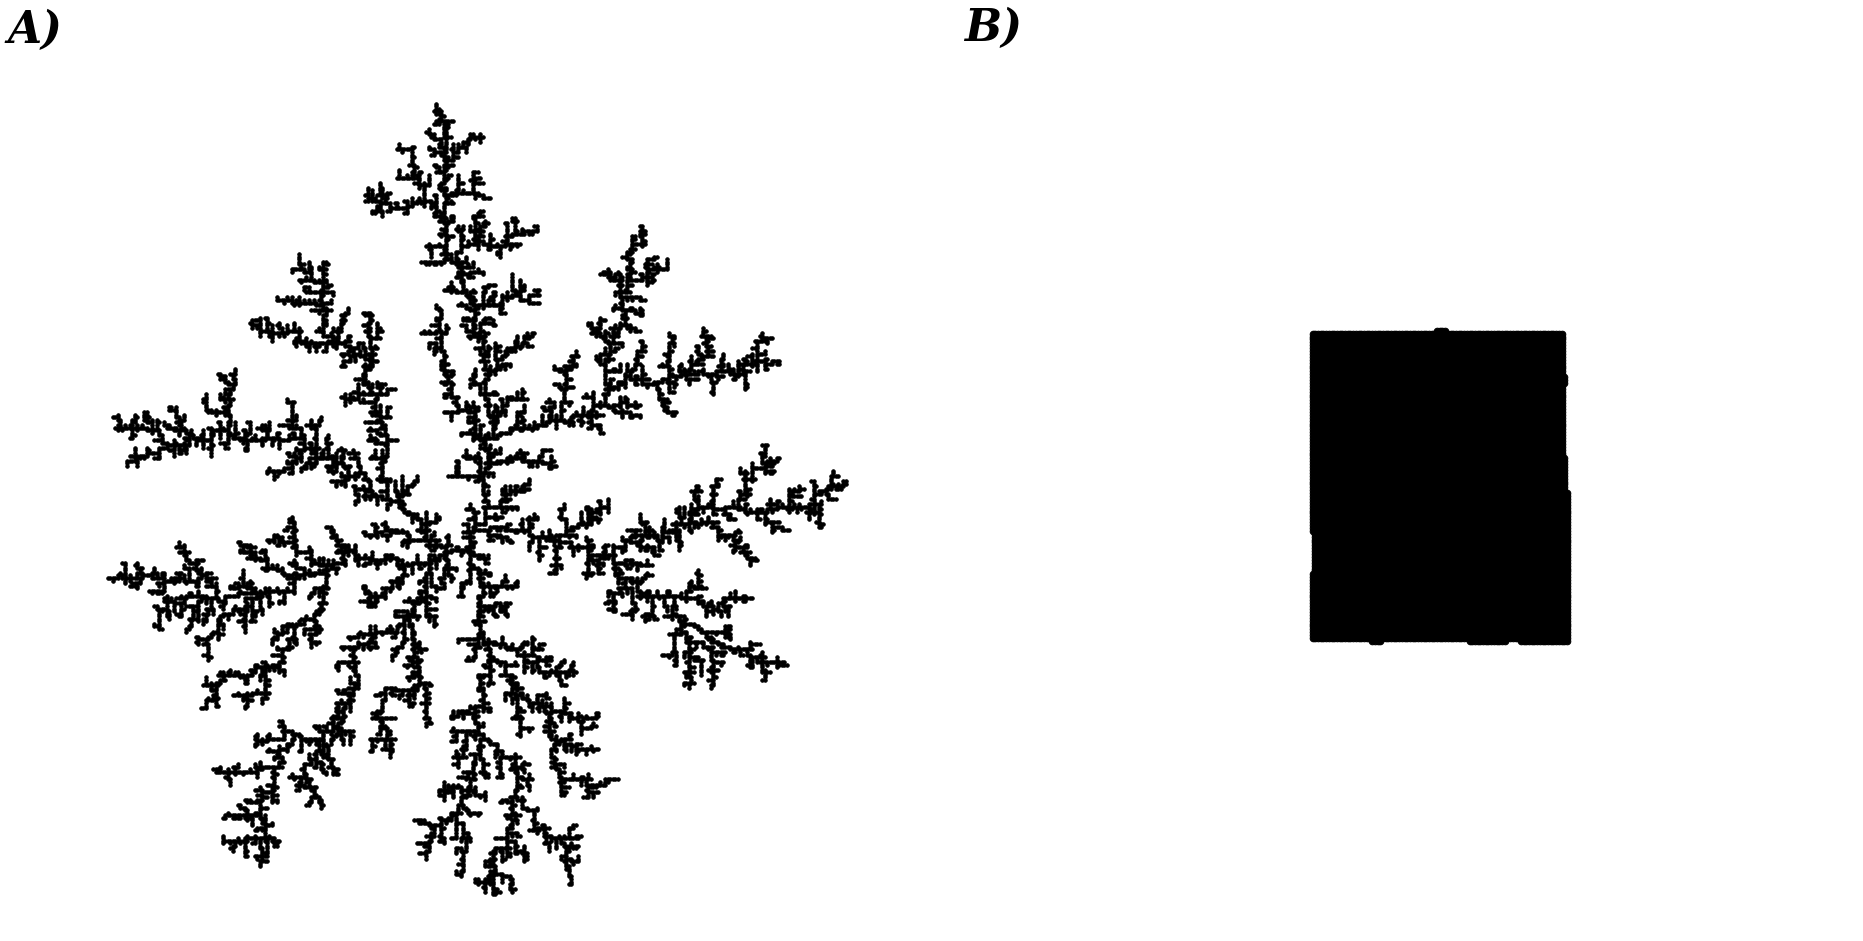

In [58]:

fontlabel = {'family': 'monospace',
        'size': 22,
        }
N = 10001

file = 'dla_13'
x = np.zeros(10001)
z = np.zeros(10001)
z_height = 1
i = 0
cont = 0
a = []
with open('./files/dla/teste_10.dat') as fid:
    for row in fid:
        row = row.split()
        x = int(row[2])
        z = int(row[4])
        a.append([x,z])
        #print(row)
        cont+=1
a = np.array(a).T

a1 = []
with open('./files/dla/teste_ts_10.dat') as fid:
    for row in fid:
        row = row.split()
        x = int(row[2])
        z = int(row[4])
        a1.append([x,z])
        #print(row)

        cont+=1
a1 = np.array(a1).T


colors = ['firebrick', 'cyan'] # first color is black, last is red
cm = LinearSegmentedColormap.from_list(
        "Custom", colors, N=N)

fontlabel = {'family': 'serif',
        'color':  'black',
        'weight': 'heavy',
        'style': 'italic',
        'size': 44,
        }
fig,axs = plt.subplots(1,2,figsize = (32,16))
axs[0].scatter(a[0],a[1], color = 'black',s=12, marker = 'o')
axs[0].text(-180,200,'A)',fontdict=fontlabel)


axs[1].scatter(a1[0],a1[1],c = 'black',s=44, marker = 'o')
axs[1].set_xlim(-150,150)
axs[1].set_ylim(-150,150)
axs[1].text(-180,158,'B)',fontdict=fontlabel)

#plt.plot(x,z,'ks')
#plt.plot(0,0,'rs')
axs[0].axis('off')
axs[1].axis('off')
fig.savefig("dla_rolling_structure.png", dpi=400)
plt.show()

10001
76.48529270389177


1.99012435253346

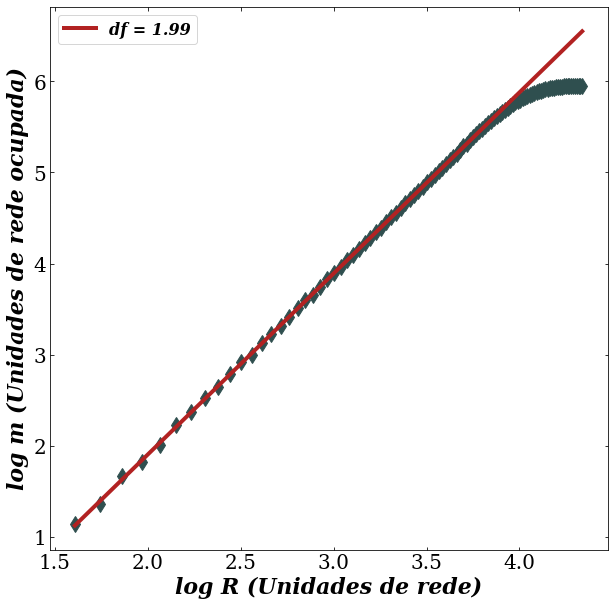

In [60]:
xs, zs= [], []
with open('./files/dla/teste_ts_10.dat', 'r') as fid:


    for row in fid:
        row = row.split()
        xs.append(int(row[2]))
        zs.append(int(row[4]))

print(len(zs))

R = 0
for i in range(len(xs)):
    r = np.sqrt(xs[i]**2 + zs[i]**2)
    if r > R:
        R = r

print(R)

fractal(R,xs,zs,0,0,25)